# Is there a salary difference between player throwing hands?

## Import the required packages, data, and clean the data

In [1]:
exec(open("../../Scripts/Packages.py").read())
exec(open("../../Scripts/Data_Import.py").read())
exec(open("../../Scripts/Data_Cleaning.py").read())

FileNotFoundError: File b'../Data/Appearances.csv' does not exist

Data organization for this research question

In [2]:
Analysis = Salary_Analysis.loc[:, ['throws', 'salary']]
Analysis['salary'] = Analysis['salary']/1000000
Pivot = Analysis.pivot(columns='throws', values='salary')
print(pivot)

## Graph the data to manually examine the differences in the group

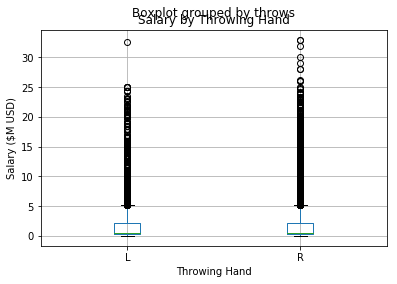

In [3]:
Analysis.boxplot(by = 'throws')
plt.title('Salary by Throwing Hand')
plt.xlabel('Throwing Hand')
plt.ylabel('Salary ($M USD)')
plt.show()

## Use statistical testing to confirm the variance

NB: This probably should be using a friedman test as the variables are not really independent

Set the significance value before any testing. 

In [4]:
alpha_value = 0.001
independent = True

Combined Statistical Testing Workflow

In [5]:
exec(open("../Scripts/Data_Testing/Statistical_Tests.py").read())

Comparing Standard Deviations

T-statistic: 1.80025738795
P-Value: 0.179681381046
  
Accept NULL hypothesis - No significant difference between the standard deviations of the groups.


Checking for Normality

P-value: 2.60606364293e-12
  
Reject NULL hypothesis - Not normal distribution


ANOVA Testing

Can one use ANOVA?
  
Independent:  True
Normal:  False
StdDevEq:  True
  
The assumptions to use ANOVA have not been met.

Kruskal-Wallis Testing

H-statistic: 0.264645345904
P-Value: 0.606946551324

Accept NULL hypothesis - No significant difference between groups.


If variable is statistically significant, append to analysis for further investigation

In [6]:
if Sig == True: 
    columns = list(CoB_Analysis)
    Capstone_csv = pd.read_csv("../Data/Capstone.csv")
    Capstone_csv[columns] = Salary_Analysis[columns]
    Capstone_csv.to_csv("../Data/Capstone.csv", index = False)